In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from utilities import visualize_classifier

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#입력 인수 처리기
def build_arg_parser() : 
    parser = argparse.ArgumentParser(description="Classify data using Ensemble Learning techniques")
    parser.add_argument("--classifier-type", dest="classifier_type", required=True, 
                        choices=["rf","erf"], help="Type of Classifier to use; can be either 'rf' or 'erf")
    return parser

In [12]:
#입력 인수 처리하기
args = build_arg_parser().parse_args()
classifier_type = args.classifier_type

usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
ipykernel_launcher.py: error: the following arguments are required: --classifier-type


SystemExit: 2

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
#load input_data
input_file = "data_random_forests.txt"
data = np.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1]

In [5]:
#dividing by class for visualization
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])
class_2 = np.array(X[Y==2])

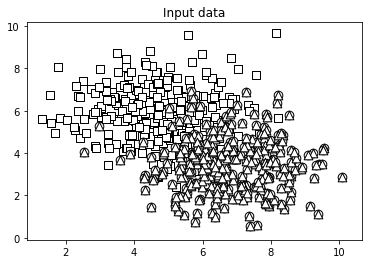

In [6]:
#data visualization
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="s")
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="o")
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="^")
plt.title("Input data")
plt.show()

In [7]:
#split into training and test set
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.25, random_state=5)

In [8]:
#setting parameters
params = {'n_estimators':100, 'max_depth':4, 'random_state':0}

if classifier_type =="rf" : 
    classifier = RandomForestClassifier(**params)
else : 
    classifier = ExtraTreesClassifier(**params)

In [3]:
classifier_type = "rf"
classifier = RandomForestClassifier(**params)

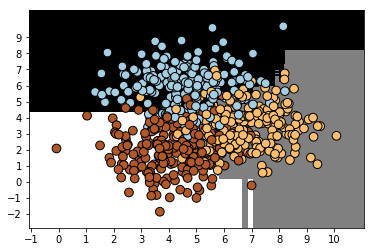

In [9]:
classifier.fit(X_train, Y_train) 
visualize_classifier(classifier, X_train, Y_train)

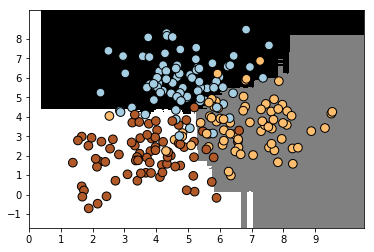

In [10]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, Y_test)

In [11]:
#evaluating classifier
class_names = ['Class-0', 'Class-1', 'Class-2']
print("n"+"#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()

n########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.91      0.86      0.88       221
    Class-1       0.84      0.87      0.86       230
    Class-2       0.86      0.87      0.86       224

avg / total       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.88        79
    Class-1       0.86      0.84      0.85        70
    Class-2       0.84      0.92      0.88        76

avg / total       0.87      0.87      0.87       225

########################################



In [20]:
classifier_type = "erf"
classifier = ExtraTreesClassifier(**params)

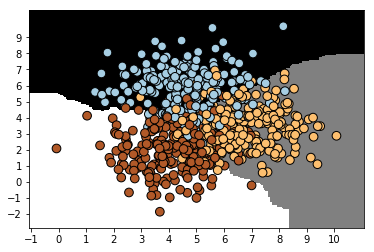

In [21]:
classifier.fit(X_train, Y_train) 
visualize_classifier(classifier, X_train, Y_train)

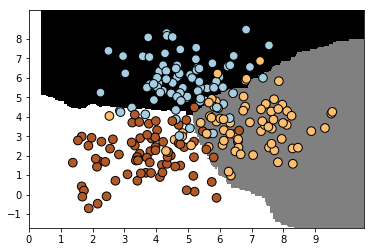

In [22]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, Y_test)

In [23]:
#evaluating classifier
class_names = ['Class-0', 'Class-1', 'Class-2']
print("n"+"#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()

n########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.89      0.83      0.86       221
    Class-1       0.82      0.84      0.83       230
    Class-2       0.83      0.86      0.85       224

avg / total       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.88        79
    Class-1       0.84      0.84      0.84        70
    Class-2       0.85      0.92      0.89        76

avg / total       0.87      0.87      0.87       225

########################################



In [26]:
#calculating reliability
test_datapoints = np.array([[5,5],[3,6],[6,4],[7,2],[4,4],[5,2]])

In [30]:
print("\nConfidence mearsure: ")
for datapoint in test_datapoints : 
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = "Class-" + str(np.argmax(probabilities))
    print("\nDataapoint:", datapoint)
    print("Probabilities:", probabilities)
    print("Predicted class:", predicted_class)


Confidence mearsure: 

Dataapoint: [5 5]
Probabilities: [ 0.48904419  0.28020114  0.23075467]
Predicted class: Class-0

Dataapoint: [3 6]
Probabilities: [ 0.66707383  0.12424406  0.20868211]
Predicted class: Class-0

Dataapoint: [6 4]
Probabilities: [ 0.25788769  0.49535144  0.24676087]
Predicted class: Class-1

Dataapoint: [7 2]
Probabilities: [ 0.10794013  0.6246677   0.26739217]
Predicted class: Class-1

Dataapoint: [4 4]
Probabilities: [ 0.33383778  0.21495182  0.45121039]
Predicted class: Class-2

Dataapoint: [5 2]
Probabilities: [ 0.18671115  0.28760896  0.52567989]
Predicted class: Class-2


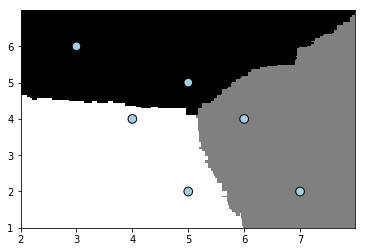

In [32]:
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints))
plt.show()